## Import python packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Introduction to clustering

Clustering is a machine learning technique used to group unlabeled datapoints in groups called *clusters*. The grouping is done such that similar items are together in the same cluster and items in different clusters are dissimilar from each-other. Typically similarity is defined using a distance measure (Euclidean, cosine, etc). Common practical applications for clustering include: market segmentation, social network analysis, search result grouping, anomaly detection etc.


Two clustering methods will be explored in this notebook:

- K-means.
- Hierarchical clustering.

More methods can be found [here](https://scikit-learn.org/stable/modules/classes.html?highlight=cluster#module-sklearn.cluster).

#### To begin with
Get familiar with how clustering works by watching the videos in Resources A and reading the article in Resources B.


#### Resources: 

* A. Introduction to clustering:
    * https://www.youtube.com/watch?v=4cxVDUybHrI
    
    
* B. A Comprehensive Survey of Clustering Algorithms
    * https://link.springer.com/article/10.1007/s40745-015-0040-1 (Read everything until the section Traditional Clustering Algorithms. From the section Traditional Clustering Algorithms, read the first 2 subsections. You can skip Modern Traditional Clustering Algorithms.)



* C. K-means clustering:
     * https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
     
     * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (up to minute 11:34)
     
     
* D. Hierarchical clustering:
    * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (from minute 11:34 onwards)
    * https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ (example on how to do hierarchical clustering with scikit-learn)
    * https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering 

### Subject comprehension 

To check your understanding, before moving further, answer the questions in your own words in the space below.

1. What is clustering? 
    - An unsupervised learning method that groups samples into different clusters based on their similarity.
2. What are the main steps in the standard process of clustering? 
    - First, the features to use for clustering are selected. Then, the clustering algorithm is implemented and the model is developed for the training data. Next, the developed model is evaluated on the test dataset.
3. What is the Silhouette coefficient? 
    - The Silhoette coefficient is a metric used to determine how well a clustering technique performs. Its value ranges from -1 to 1, where values closer to 1 indicate that samples fit well in their matched cluster and do not fill well in surrounding clusters. 
4. What are the two types of evaluation for a clustering algorithm and what is the difference between them?
    - Two types of evaluation are:
    1. internal metrics that evaluate the performance of the model based solely on the data and the clustering results, such as the Solhouette coefficient, and 
    2. external methods that bring is outside information such as ground truth labels to evaluate the performance of the model. 

### Data acquisition

Load the data about bank clients from the *bank-full.csv* file into a pandas dataframe. Make the necessary imports.

In [40]:
# code here
df_bank = pd.read_csv('../data/bank-full.csv', sep=';')

Print a summary of the data as well as the first 5 rows.

In [41]:
# code here
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [42]:
df_bank.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

### Preprocessing

To facilitate the computation of distances, keep only the numerical features in the dataset.

- Remove all non-numerical features, as well as the features related to the date.
- Make sure there are no missing values - if they exist, remove them.
- Normalize the new dataset (transform the data for multiple features to the same scale).
- Save the result in a dataframe *df_norm*

In [43]:
# code here
df_num = df_bank.select_dtypes(exclude=object)
df_num = df_num.drop('day', axis=1)

In [44]:
df_num.isna().sum().sum()

np.int64(0)

In [45]:
df_num.head()

age  balance  duration  campaign  pdays  previous
0   58     2143       261         1     -1         0
1   44       29       151         1     -1         0
2   33        2        76         1     -1         0
3   47     1506        92         1     -1         0
4   33        1       198         1     -1         0

In [46]:
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

num_pipeline.fit(df_num)
num_array = num_pipeline.transform(df_num)
df_num = pd.DataFrame(num_array, index=df_num.index, columns=df_num.columns)

Plot histograms of features

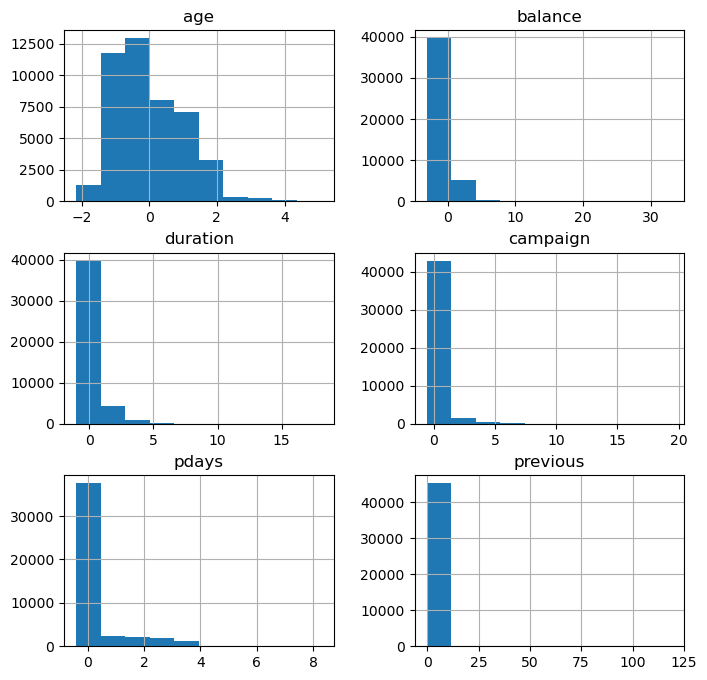

In [65]:
# code here
df_num.hist(figsize=(8,8))
plt.show()

## KMeans


Let's warm up with the well known algorithm named KMeans!

Centroid-based clustering organizes the data into non-hierarchical clusters, contrarily to hierarchical clustering. KMeans is the most widely-used centroid-based clustering algorithm. Centroid-based algorithms are efficient but sensitive to initial conditions and outliers. 


To better understand the way the algorithm works, read the documents and watch the video in Resources C:
* https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
* https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (up to minute 11:34)


Then answer the below questions (in your own words):
1. What is a centroid? The center of a group of data samples.
2. How can you compute a centroid? Take the average each of the features for each sample in the cluster.
3. Are you supposed to know in advance the number of clusters in order to use the KMeans algorithm? No, but you can try to determine the best number of clusters to use from the elbow method or the silhouette method.


*Answer here*

#### Make the necessary imports from scikit learn in order to perform KMeans clustering

In [6]:
# code here
from sklearn.cluster import KMeans

#### Exploring KMeans with sklearn

The goal of this step is to become familiar with the sklearn clustering package and the silhouette analysis concepts.

Start by peforming a clustering of the data in *df_norm* into 5 clusters.

In [67]:
# code here
n_clus = 5 

kmeans = KMeans(n_clusters = n_clus)
kmeans.fit(df_num)

KMeans(n_clusters=5)

Print the centroids obtained

In [68]:
# code here
kmeans.cluster_centers_

array([[-0.65847917, -0.16575012, -0.2433859 ,  0.04101673, -0.37696825,
        -0.22202329],
       [-0.14477327, -0.07089605, -0.09660423, -0.20700141,  2.22751775,
         1.29821546],
       [ 0.26284546,  4.7323814 , -0.0594852 , -0.04308315, -0.10037165,
        -0.03291975],
       [ 1.0933572 , -0.05019743, -0.24688039,  0.05026518, -0.33746858,
        -0.19351295],
       [-0.07820644, -0.03872039,  2.5474727 , -0.0673729 , -0.26496968,
        -0.15986524]])

Print the cluster labels assigned to each point

In [69]:
# code here
kmeans.labels_

array([3, 3, 0, ..., 4, 3, 1], shape=(45211,), dtype=int32)

### **Visualization**

Let's try to visualize the created clusters. As it is easier to visualize 2-dimensional data, first run PCA on the data. Then create a scatterplot to visualize the clustered points, each coloured differently depending on the cluster they belong to.

In [71]:
# code here
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df_num)
pca_out = pca.transform(df_num)
pca_out

array([[-0.39344908,  1.33724358],
       [-0.39103018, -0.065795  ],
       [-0.37113171, -0.79650215],
       ...,
       [ 1.66729527,  3.52660215],
       [-0.55311955,  1.01087375],
       [ 4.23067809,  0.07086432]], shape=(45211, 2))

In [72]:
df_clustered = pd.DataFrame(pca_out, columns=['pc1', 'pc2'])
df_clustered['labels'] = kmeans.labels_
df_clustered

pc1       pc2  labels
0     -0.393449  1.337244       3
1     -0.391030 -0.065795       3
2     -0.371132 -0.796502       0
3     -0.392309  0.352096       3
4     -0.354773 -0.639436       0
...         ...       ...     ...
45206 -0.411889  1.395701       4
45207 -0.467420  2.152026       3
45208  1.667295  3.526602       4
45209 -0.553120  1.010874       3
45210  4.230678  0.070864       1

[45211 rows x 3 columns]

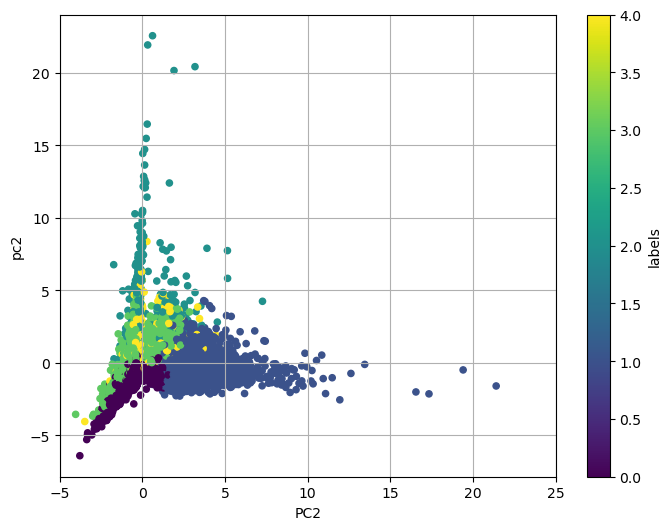

In [78]:
fig, ax = plt.subplots(figsize = (8,6))
df_clustered.plot(kind='scatter',
                  x='pc1',
                  y='pc2',
                  c='labels',
                  cmap='viridis',
                  ax=ax)
ax.set_xlabel('PC1')
ax.set_xlabel('PC2')
ax.set_xlim(-5, 25)
ax.grid()

### Evaluation

**Inertia** can be a measure of how internally coherent clusters are. It represents the within-cluster sum-of-squares.

Read more about it here:
https://scikit-learn.org/stable/modules/clustering.html#k-means 

Print the inertia obtained after the clustering.

In [79]:
# code here
kmeans.inertia_


150204.59099065105

**The silhouette score**

Make the necessary imports from scikit learn and compute the silhoutte score.

Read what this score represents and how it is computed here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html and here https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

In [81]:
# code here
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette = silhouette_score(df_num, kmeans.labels_)
print('Silhouette Score:', silhouette)

Silhouette Score: 0.28599652780286805


You can read more about other clustering evaluation methods here: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

### Finding the optimal number of clusters

In the following article you will find several [methods](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set) for determining the number of clusters.

We will first use the silhouette score for obtaining the optimal number of clusters. Optional: another method you can try is the [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) ).


**Use the silhouette analysis to find an optimal number of clusters for the bank clients data.** <u><i>Hint:</u></i> Feel free to use the `n_jobs` hyperparameter to speed up your computation.

An example of silhouette analysis is presented here: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

Plot the silhouette scores for 20 different numbers of clusters of your choice.

In [ ]:
df_num_samp = df_num.sample(5000)
df_num_samp = df_num_samp.reset_index(drop=True)

In [94]:
pca = PCA(n_components=2)
pca.fit(df_num_samp)
pca_out_samp = pca.transform(df_num_samp)

df_clustered_samp = pd.DataFrame(pca_out_samp, columns=['pc1', 'pc2'])

For n_clusters = 2 The average silhouette_score is : 0.41456540873782505
For n_clusters = 3 The average silhouette_score is : 0.4401861320019501
For n_clusters = 4 The average silhouette_score is : 0.4296087343330893
For n_clusters = 5 The average silhouette_score is : 0.38307641287053373
For n_clusters = 6 The average silhouette_score is : 0.30182713894909974
For n_clusters = 7 The average silhouette_score is : 0.3112544954623162
For n_clusters = 8 The average silhouette_score is : 0.27239166378489427
For n_clusters = 9 The average silhouette_score is : 0.28079440144557677
For n_clusters = 10 The average silhouette_score is : 0.23147111757142544
For n_clusters = 11 The average silhouette_score is : 0.23320428680789218
For n_clusters = 12 The average silhouette_score is : 0.22696903888766973
For n_clusters = 13 The average silhouette_score is : 0.23076750903749613
For n_clusters = 14 The average silhouette_score is : 0.23383115878170152
For n_clusters = 15 The average silhouette_score 

/var/folders/cw/t92_wwv10n16x5plcfhdtwxh0000gn/T/ipykernel_40535/4160647976.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18, 7))


For n_clusters = 22 The average silhouette_score is : 0.2075865903190086


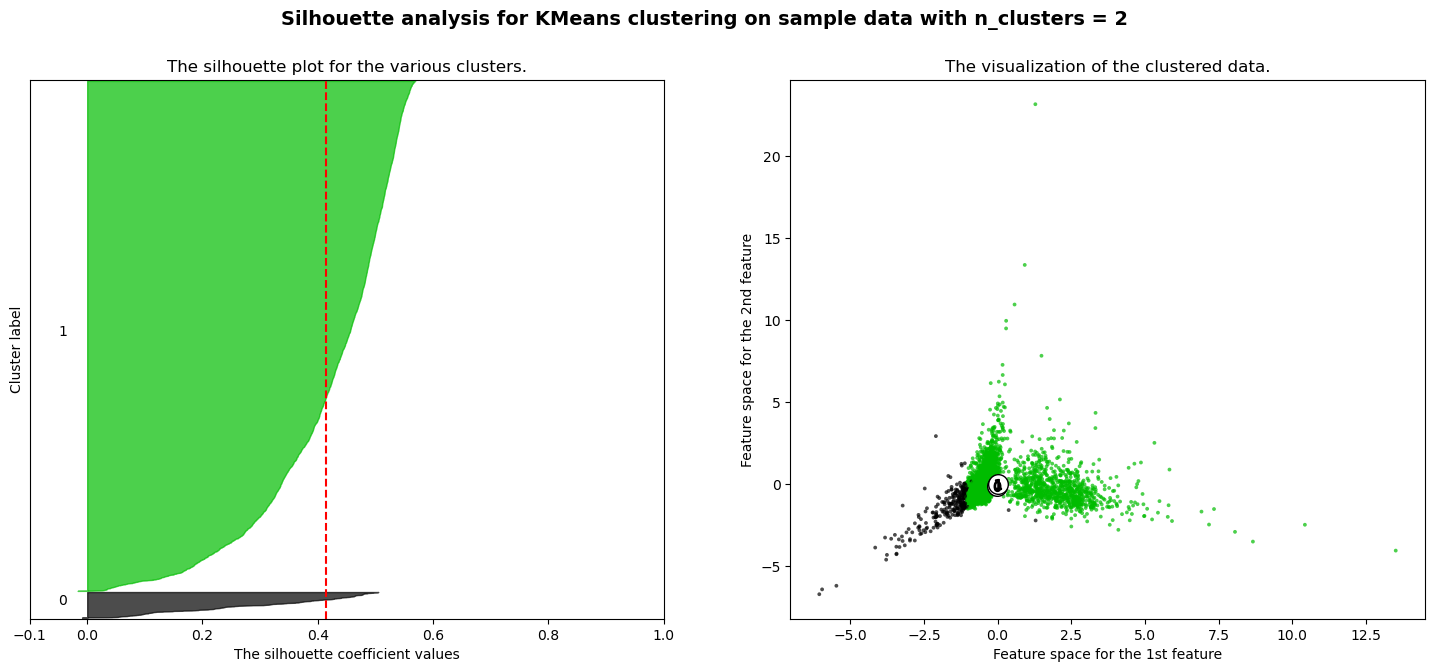

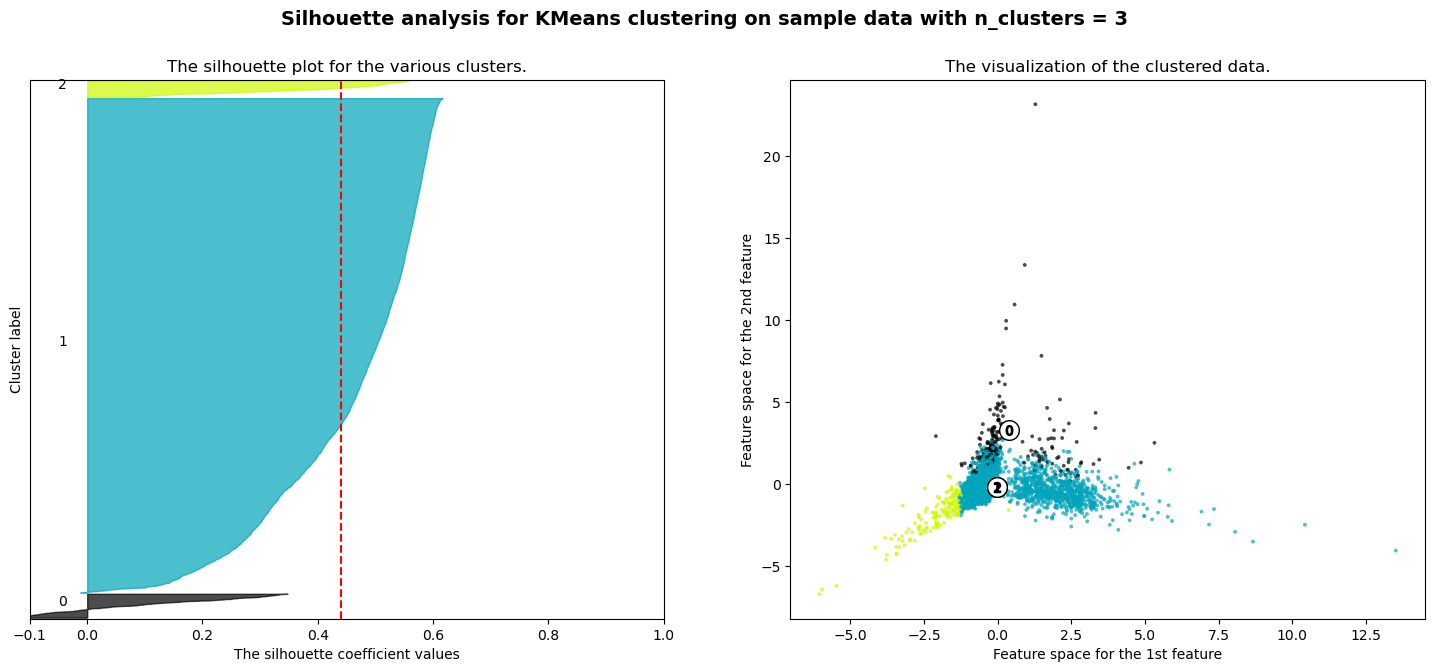

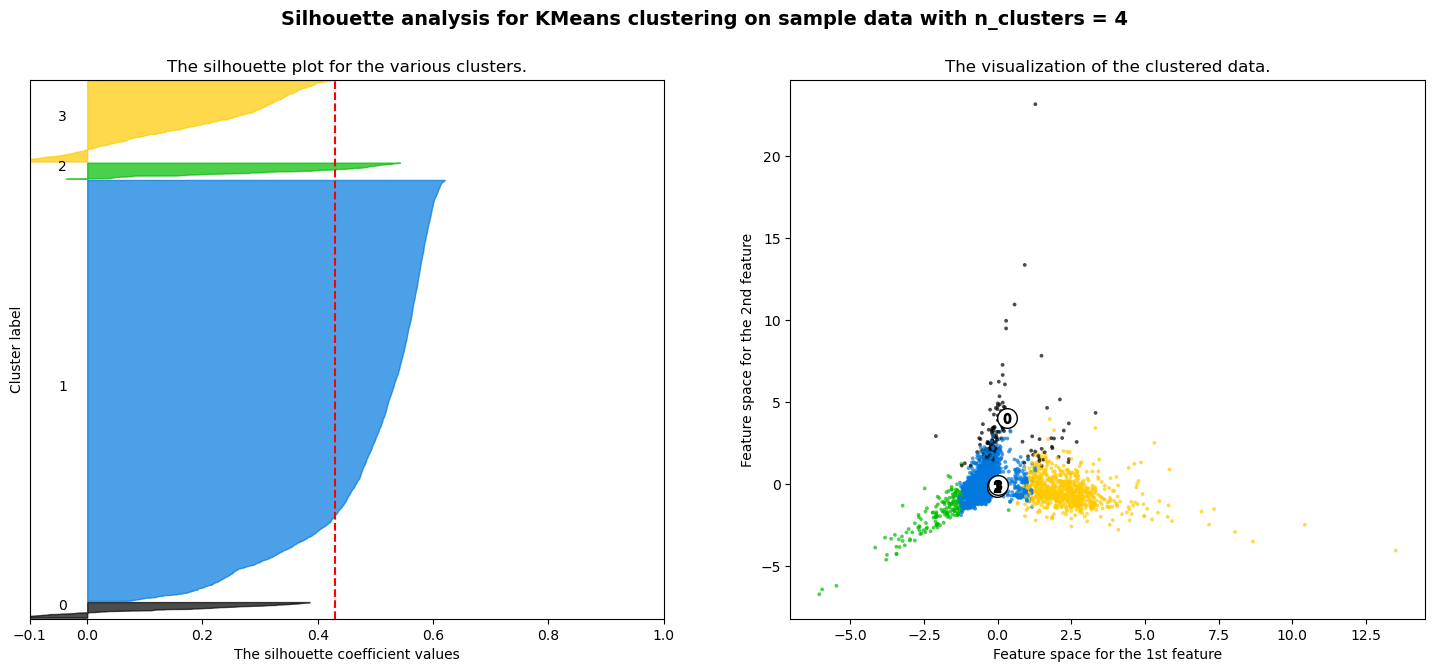

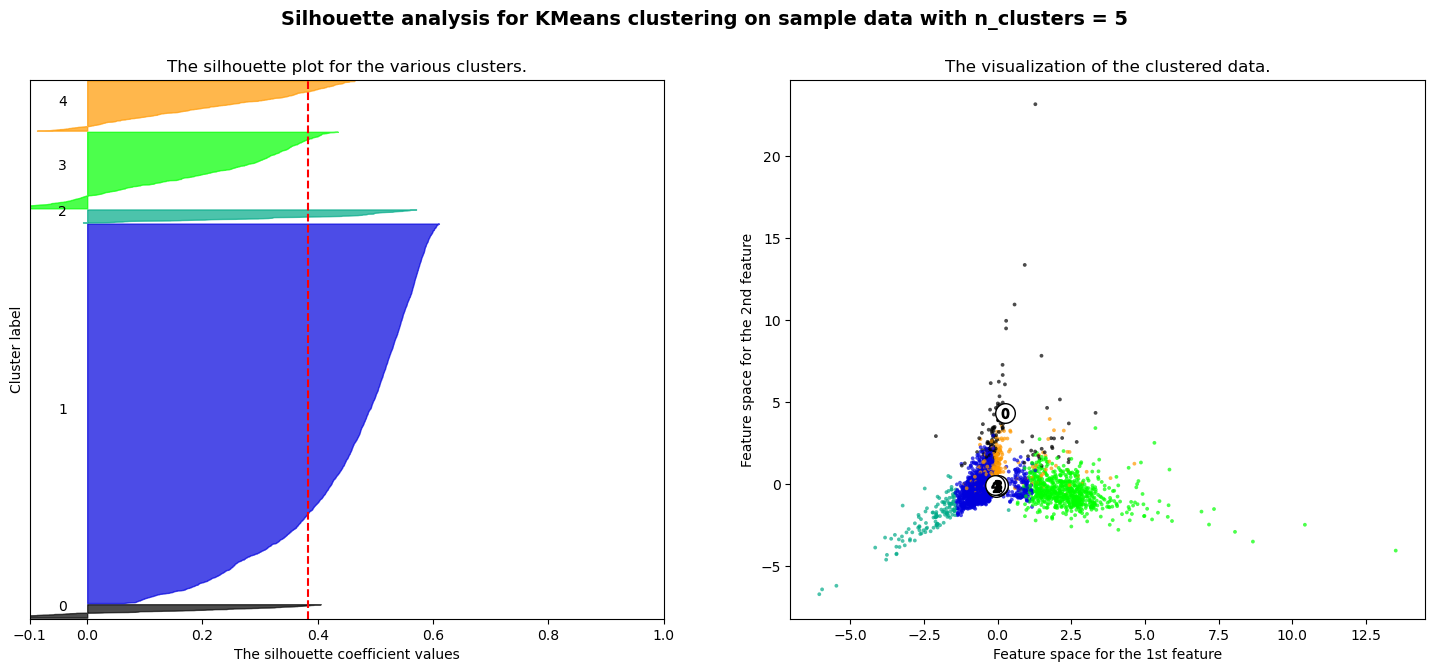

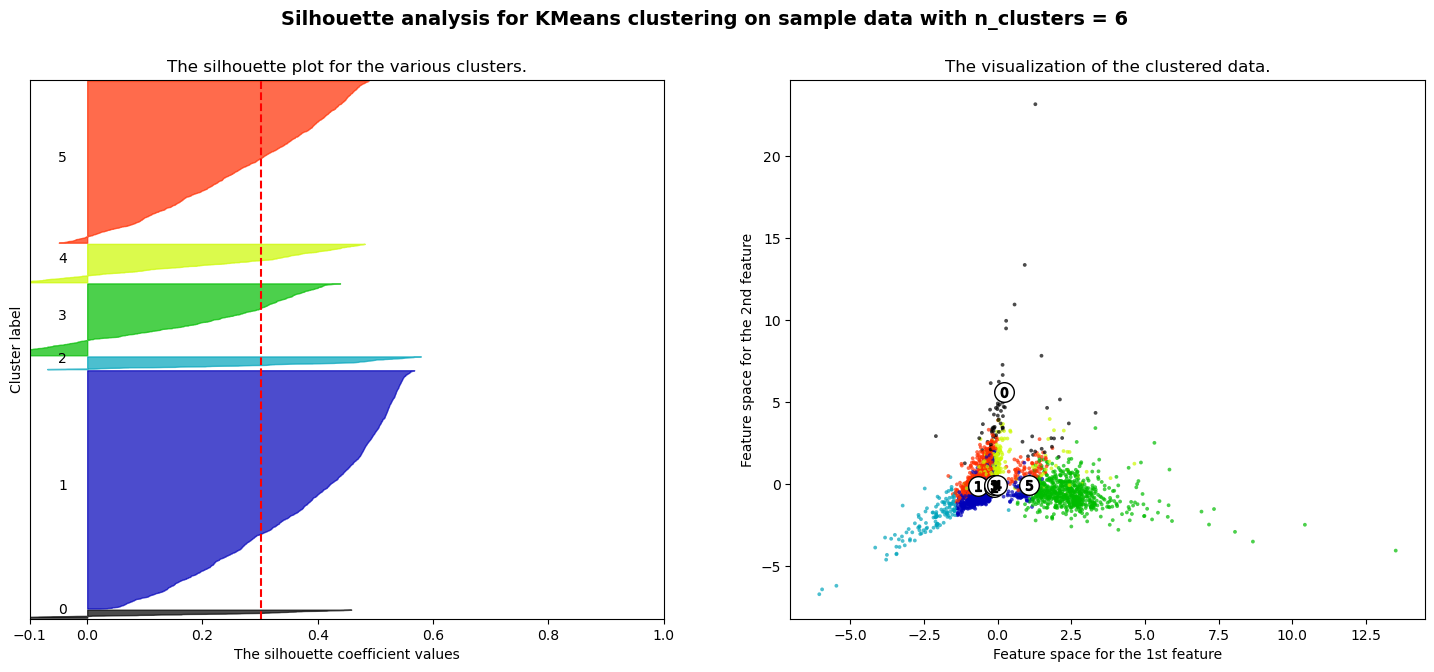

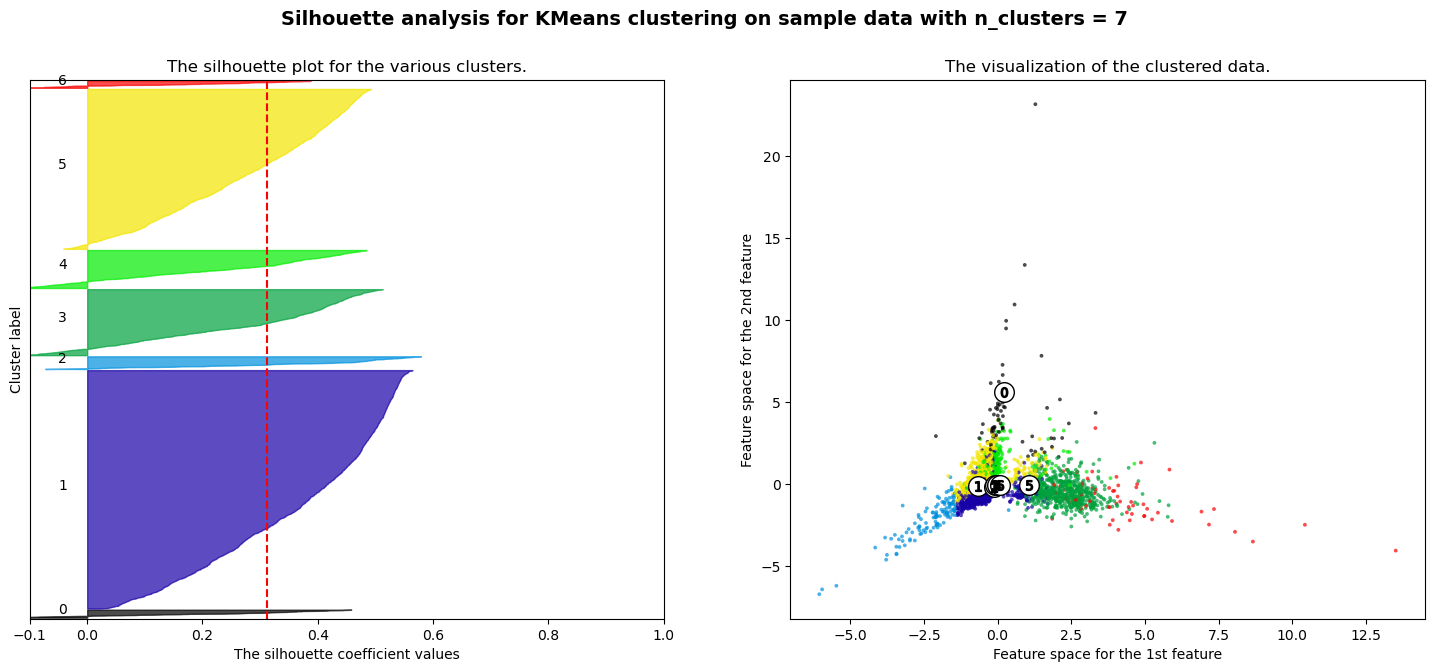

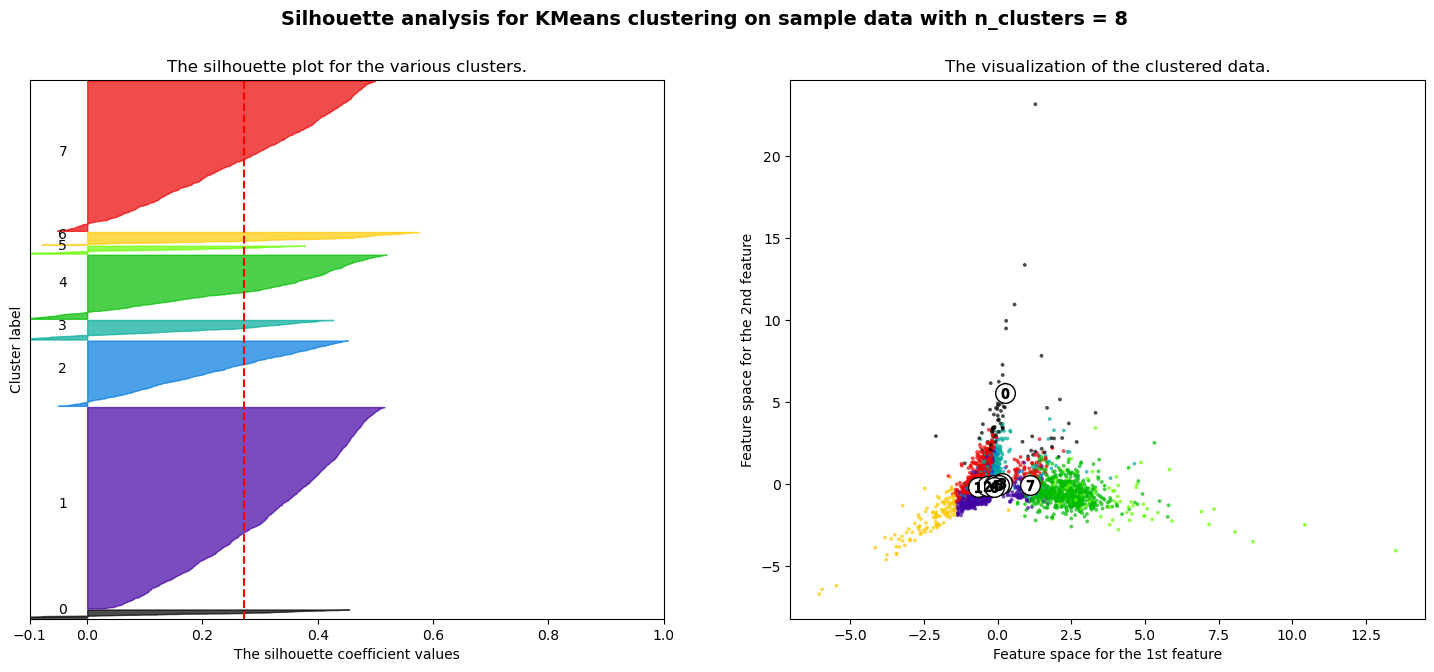

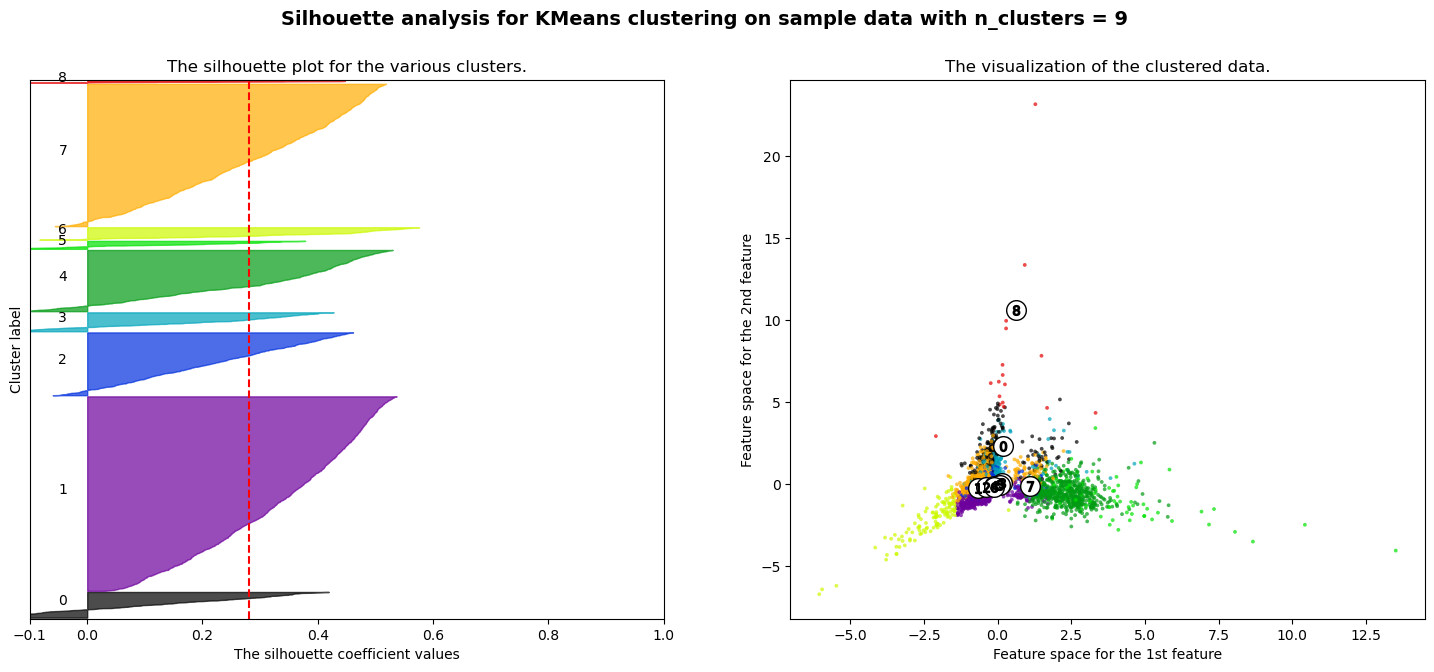

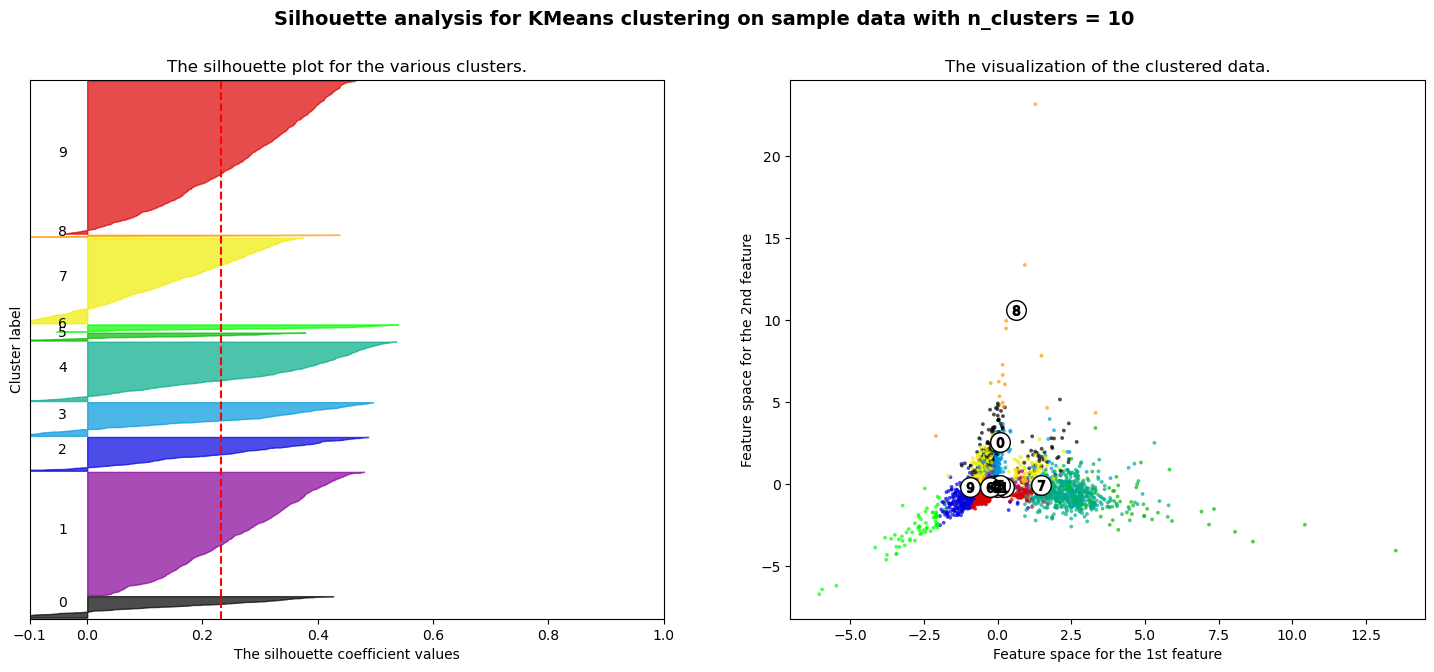

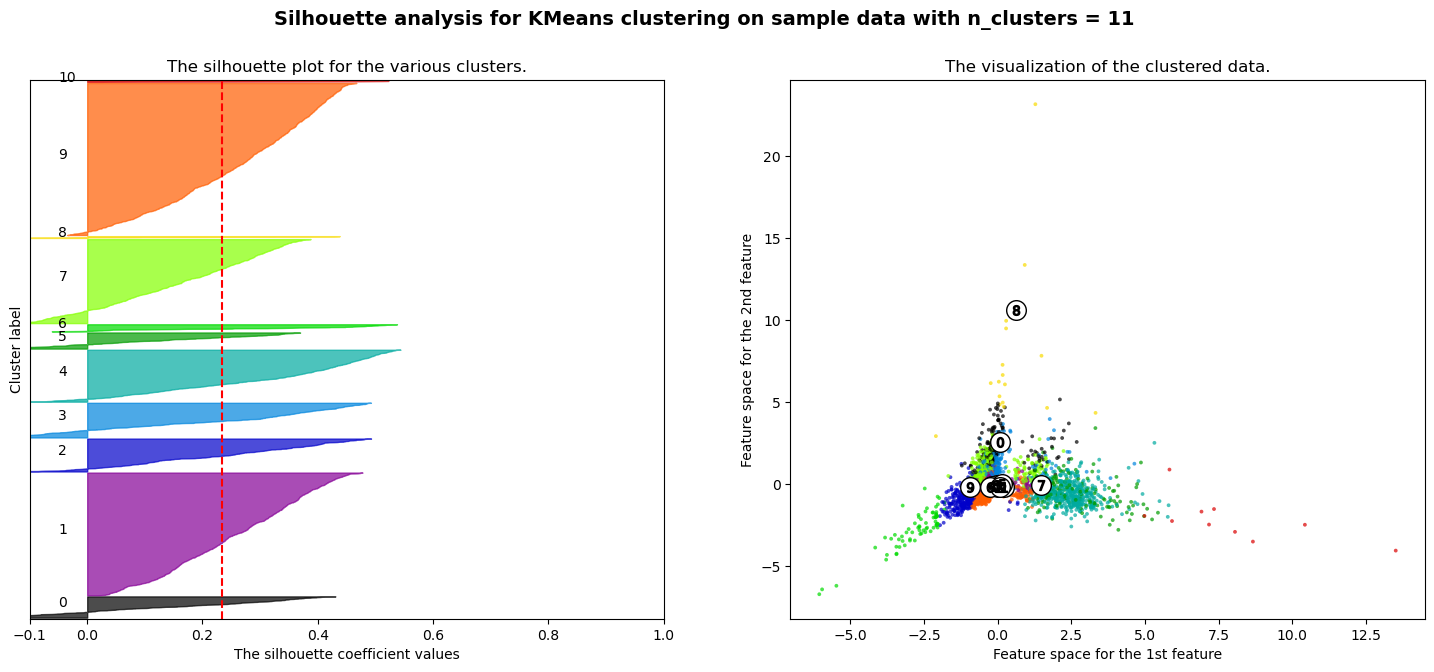

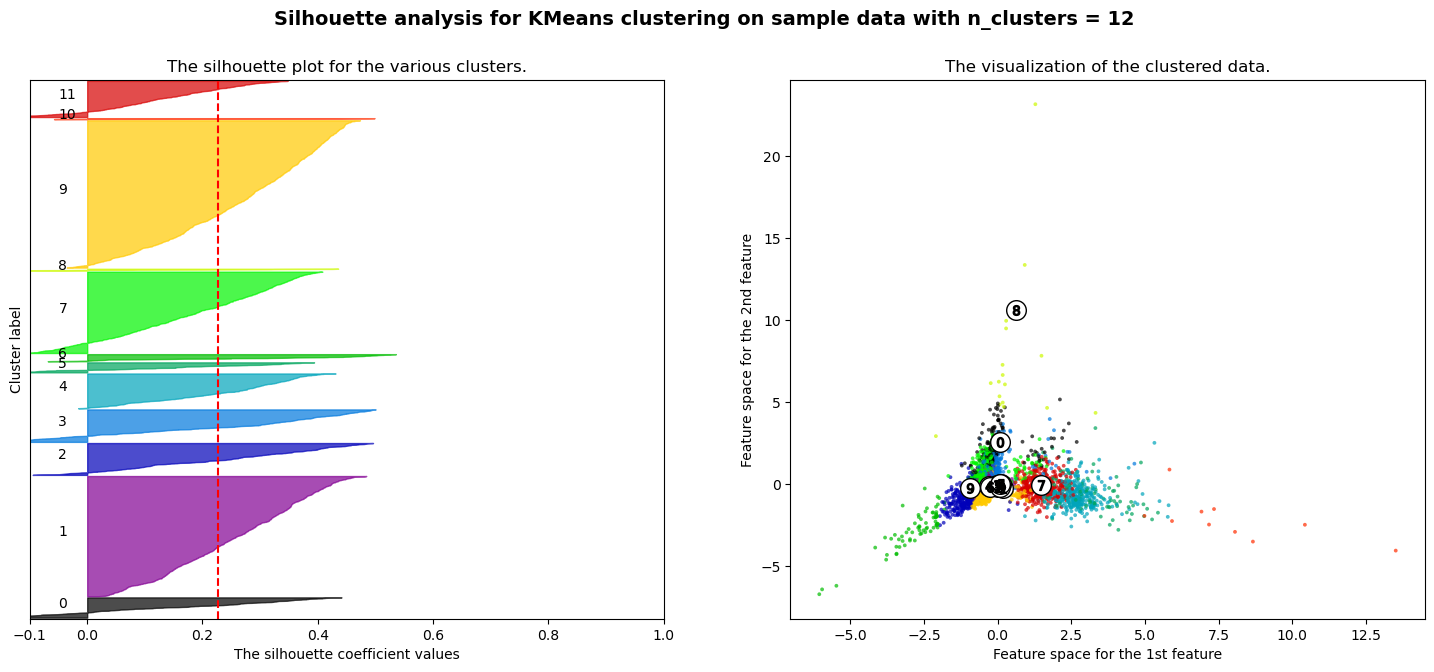

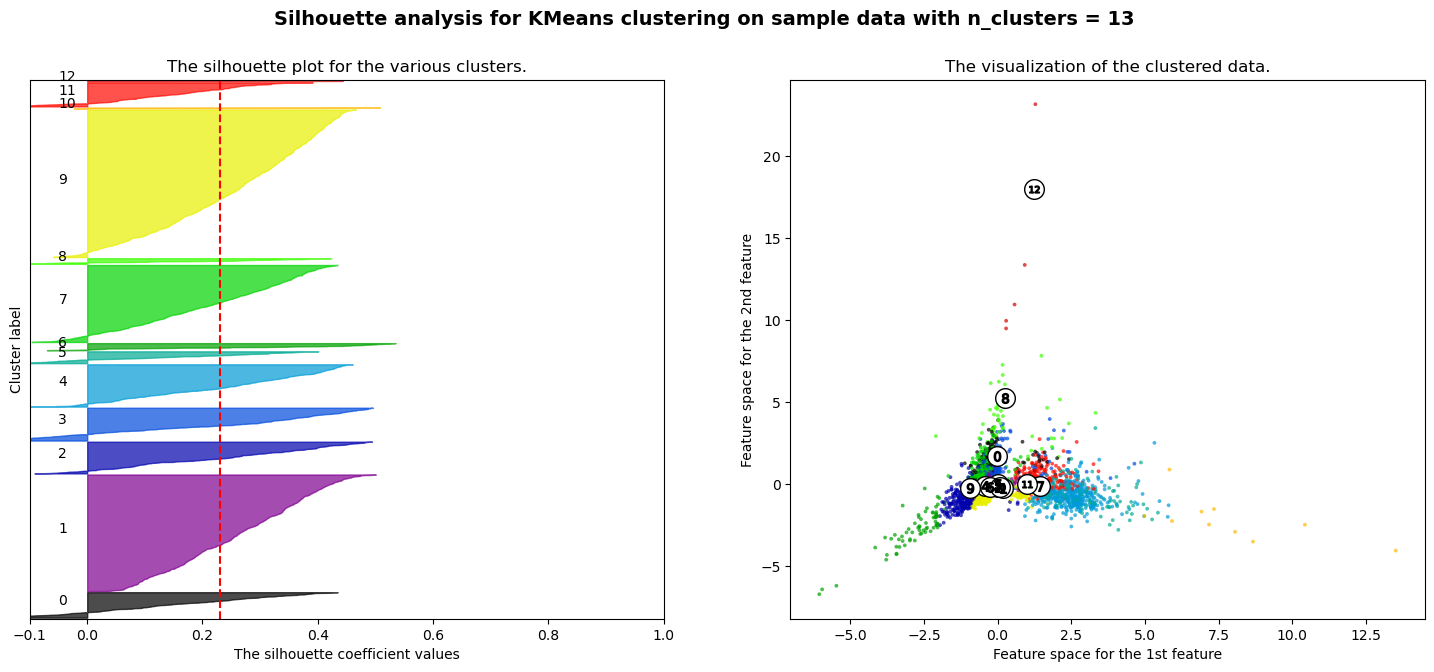

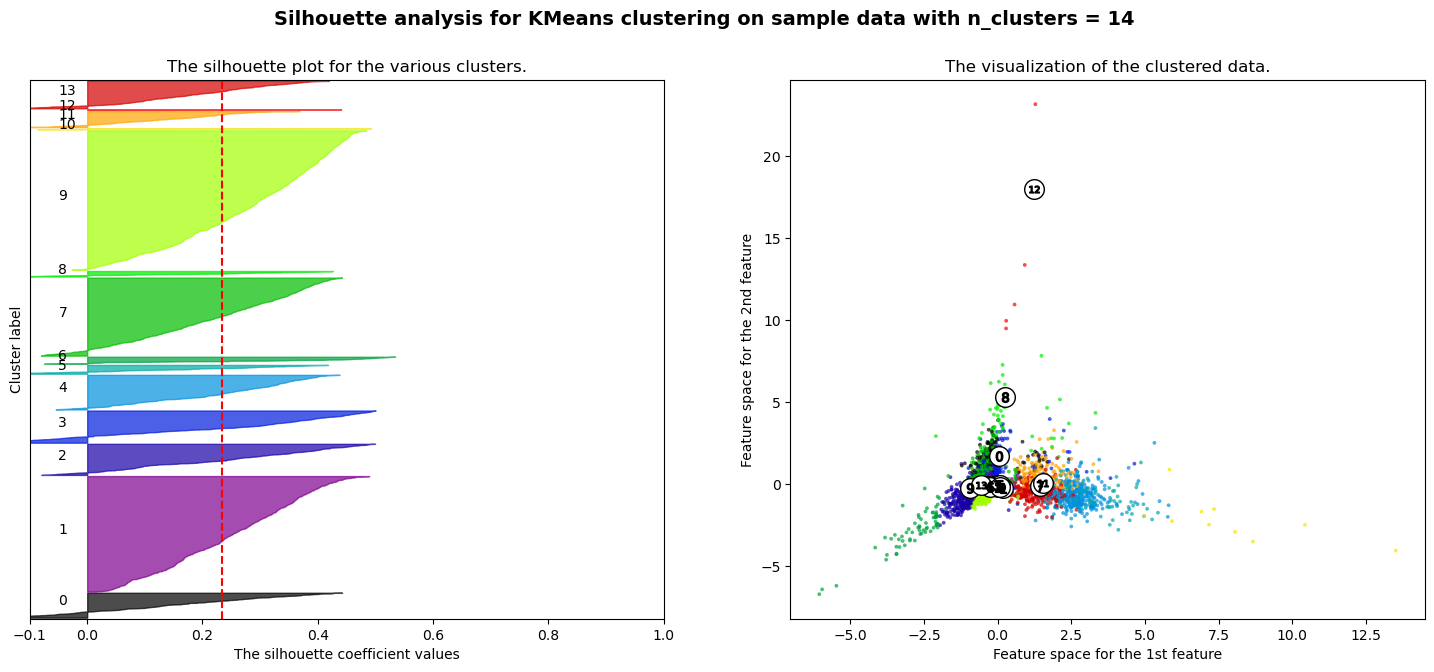

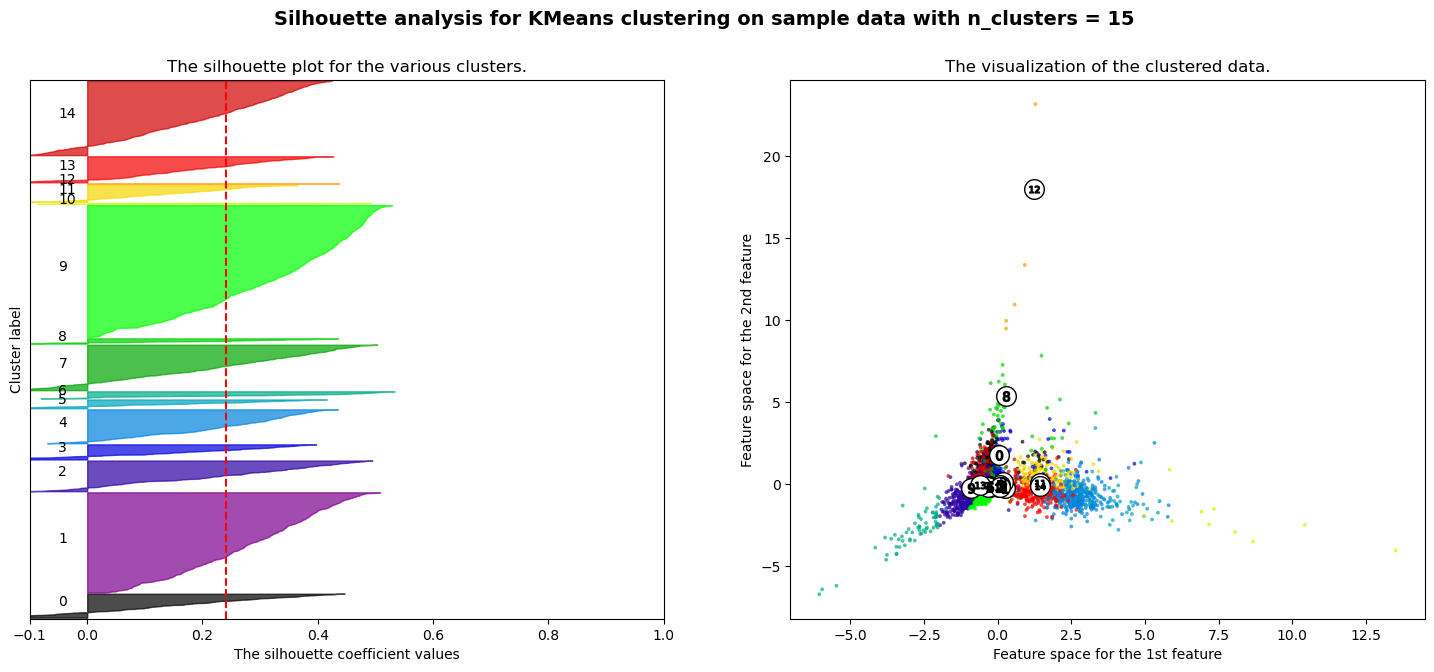

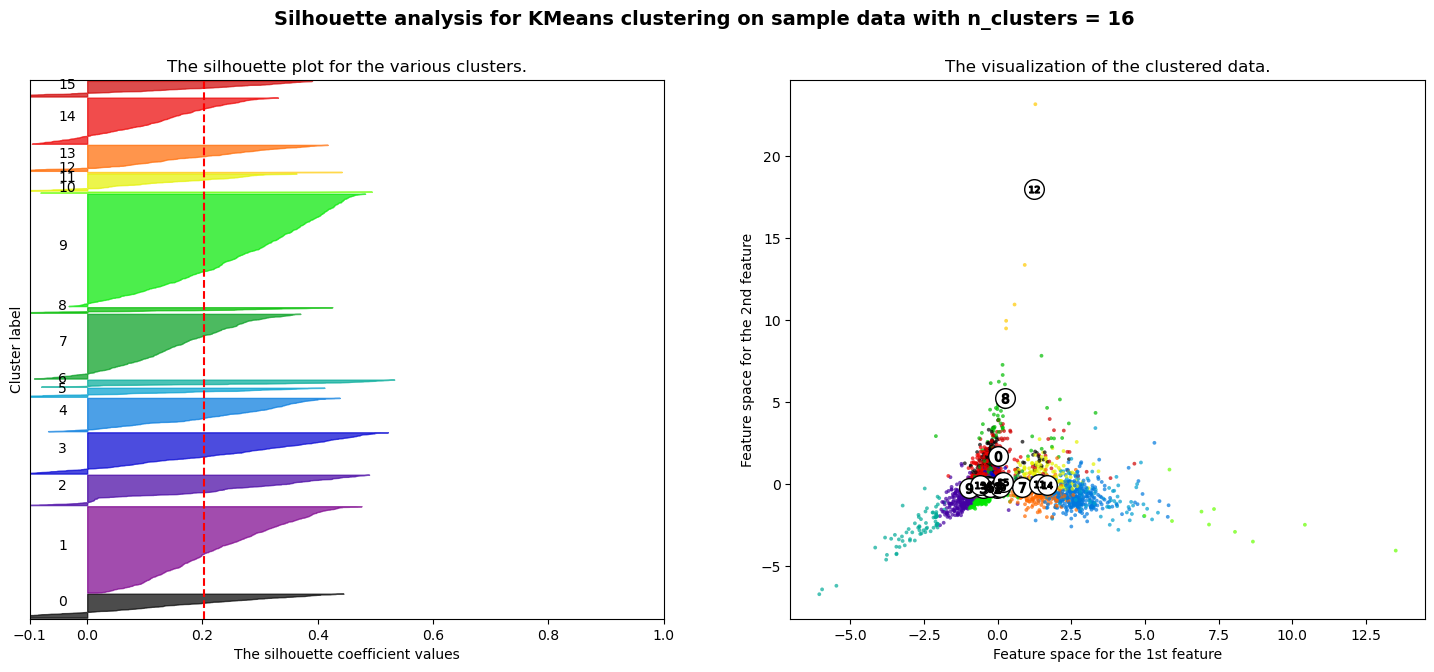

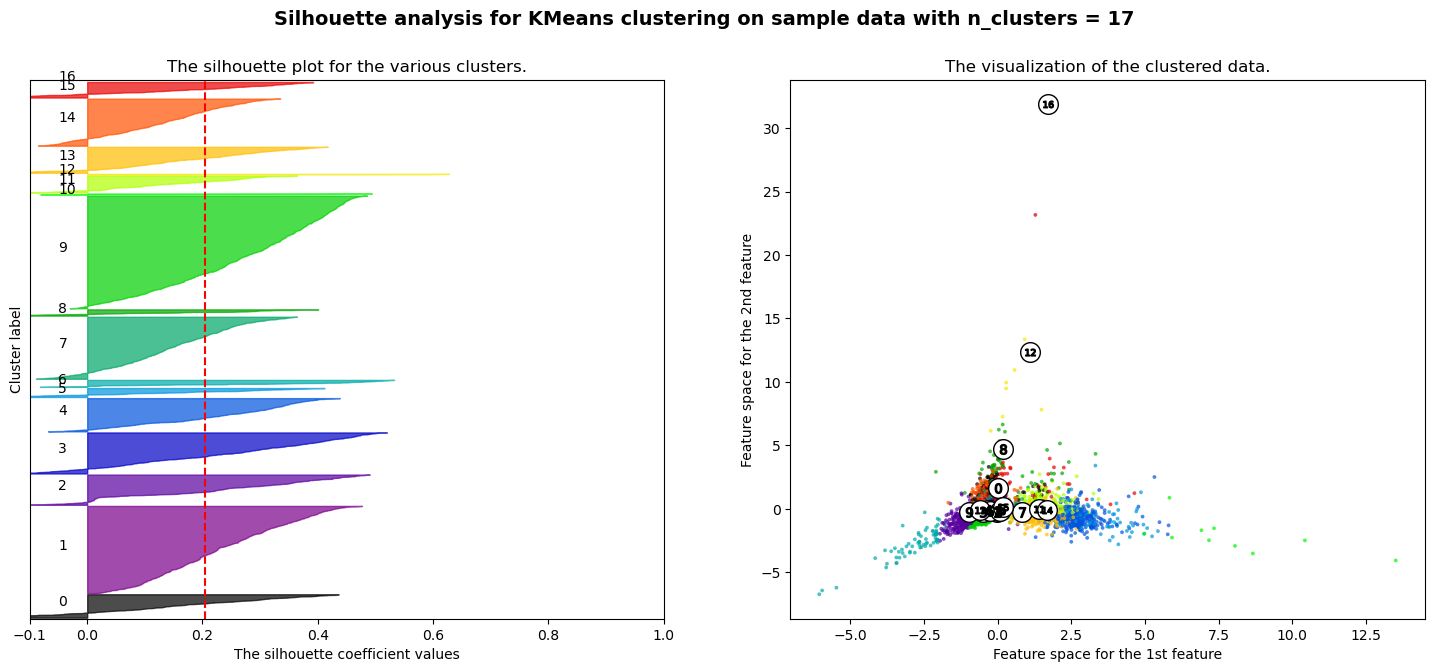

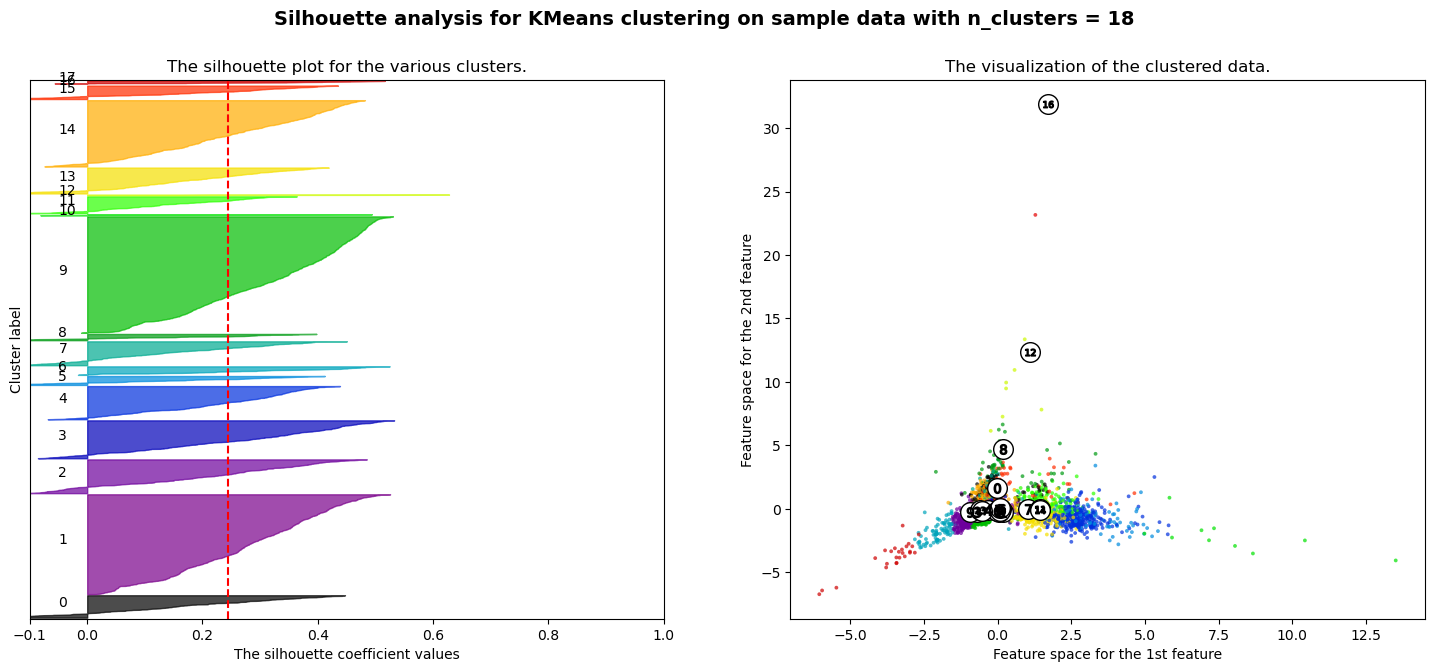

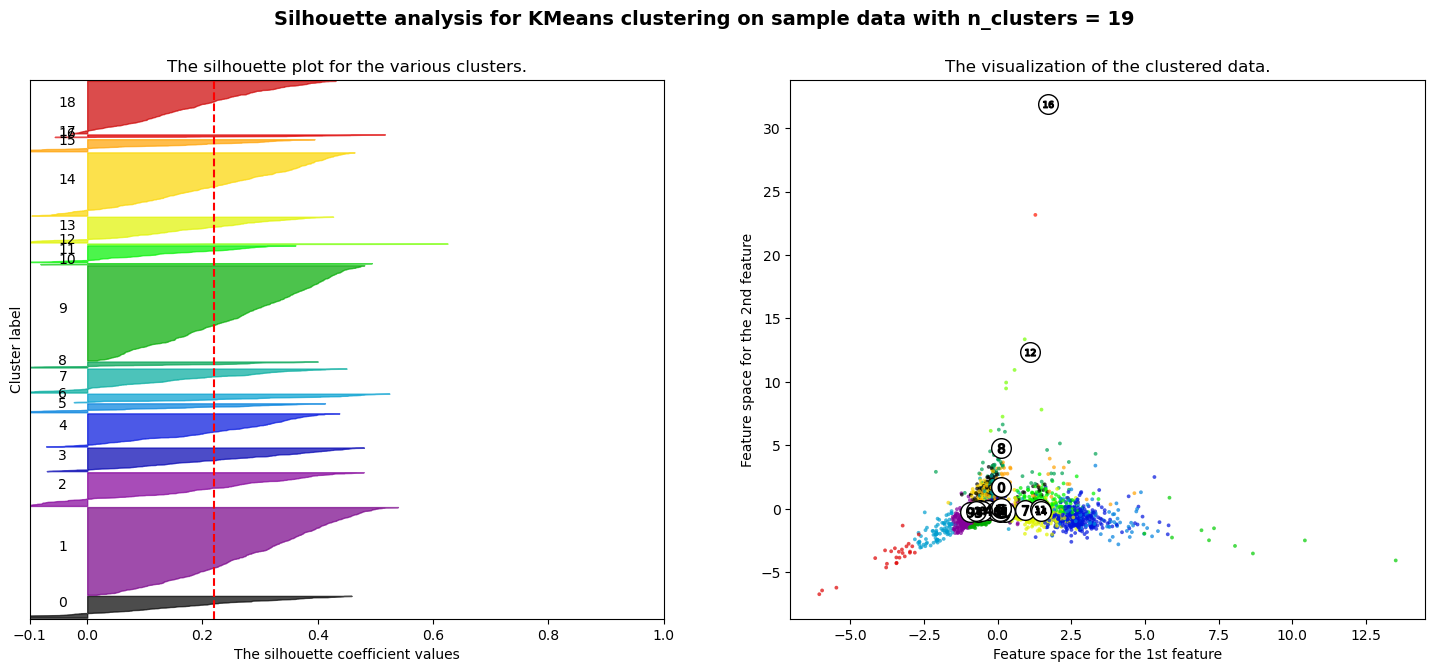

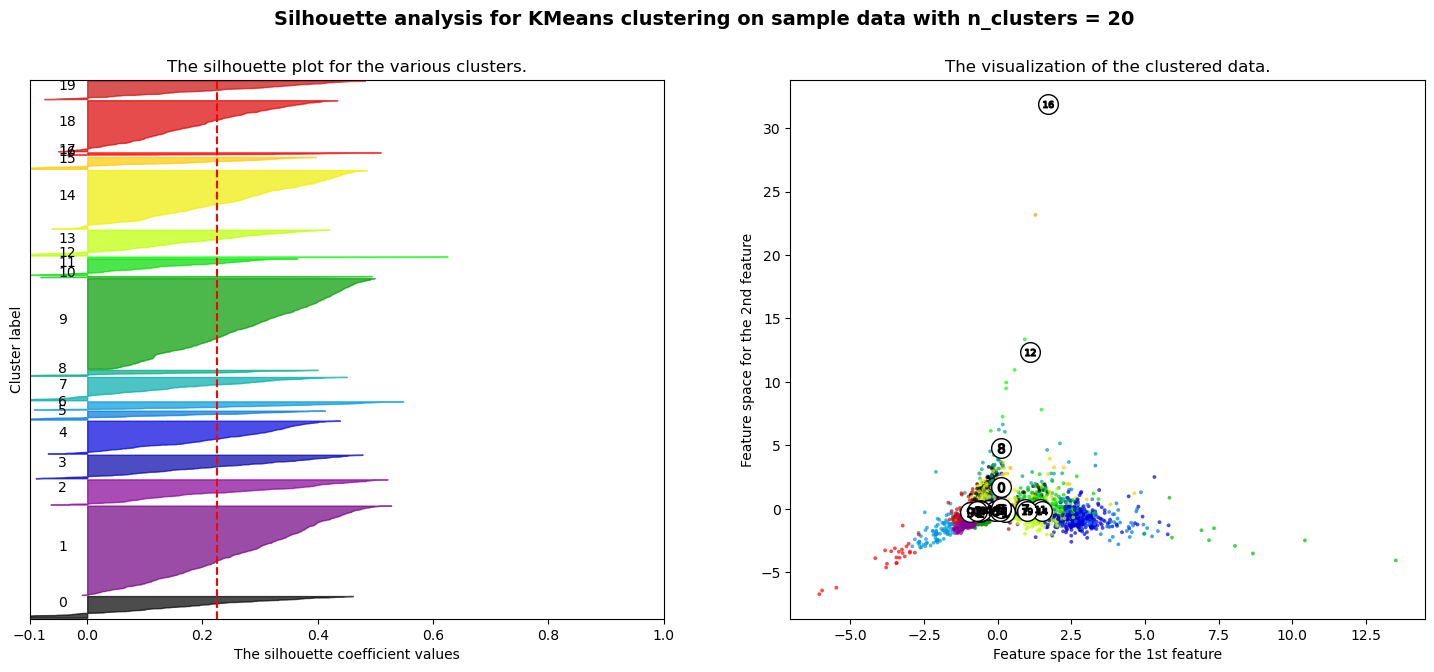

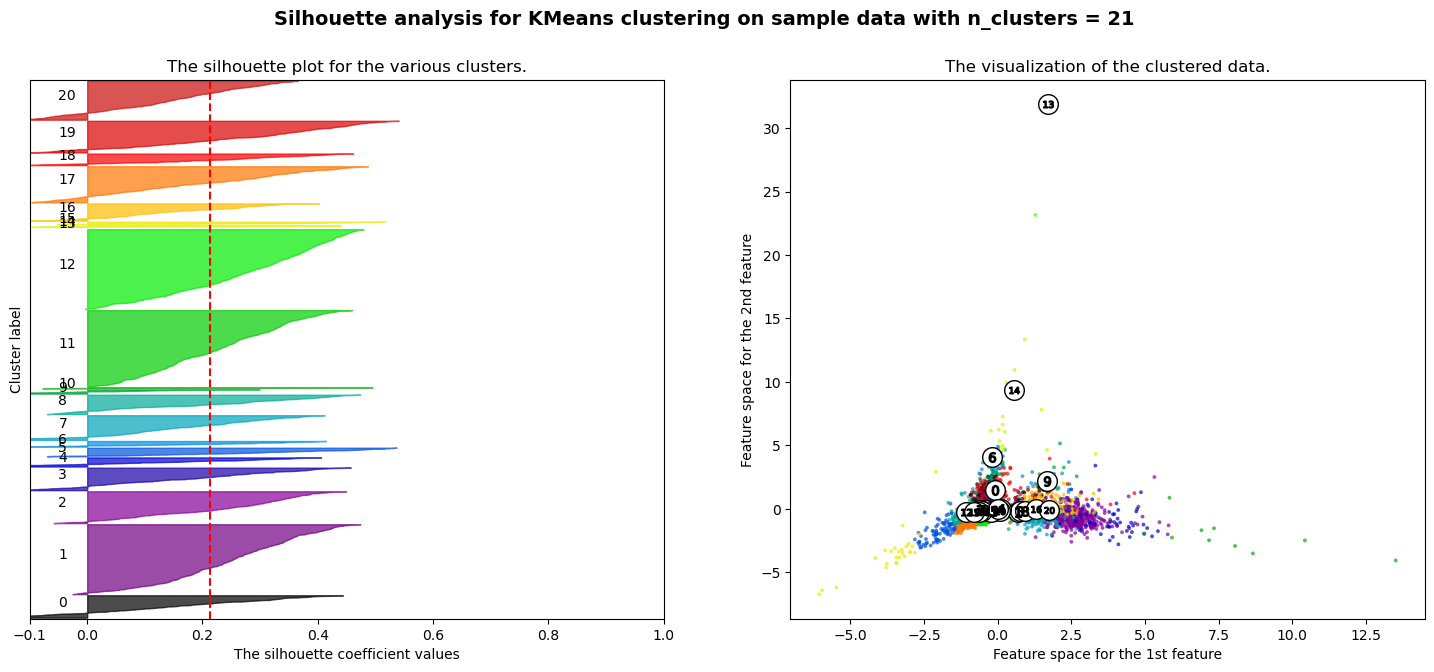

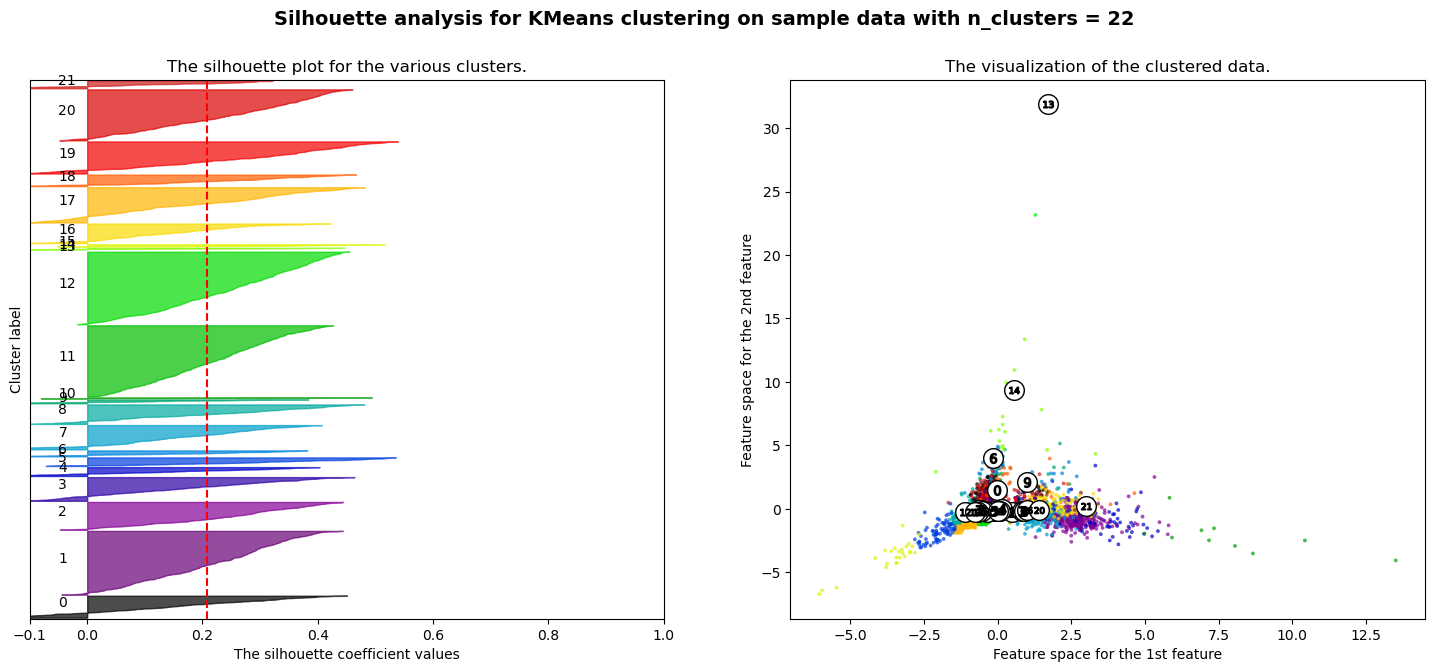

In [96]:
# code here
import matplotlib.cm as cm

range_n_clusters = range(2,23)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18, 7))

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_num_samp) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_num_samp)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_num_samp, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_num_samp, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        df_clustered_samp['pc1'], df_clustered_samp['pc2'], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )


plt.show()

What is the optimal number of clusters that you obtained?

2

## Hierarchical Clustering

Let's try to apply now a different method on the same data. You can find more explanations on hierarchical clustering in the links in section Resources D. Hierarhchical clustering:
 * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (from minute 11:34 onwards)
 * https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ (example on how to do hierarchical clustering with scikit-learn)
 * https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

Make the necessary imports from scikit learn to perform hierarchical clustering. 

Start by plotting the dendrogram and deciding the number of clusters. Then apply hierarchical clustering.

You might find this useful: https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html for creating the dendrogram.

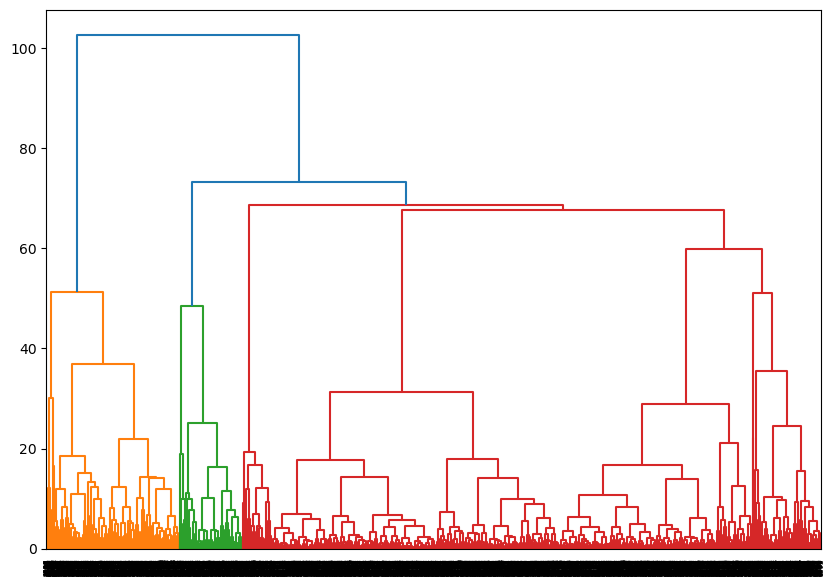

In [98]:
# code here
import scipy.cluster.hierarchy as shc

fig,ax=plt.subplots(figsize=(10, 7))
clusters = shc.linkage(df_num_samp, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters, ax=ax)
plt.show()

How many clusters did you find?

2

Compare the kmeans labels with the labels obtained by the hierarchical clustering.

In [105]:
# code here
from sklearn.cluster import AgglomerativeClustering

agg_clus = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
agg_clus_pred = agg_clus.fit_predict(df_num_samp)

In [106]:
kmeans = KMeans(n_clusters = 2)
kmeans_pred = kmeans.fit_predict(df_num_samp)

In [107]:
from sklearn.metrics import rand_score
rand_score(agg_clus_pred, kmeans_pred)

0.9350449289857972

### Application: clustering images

Theses techniques can be use to reduce the number of colours in a picture

- find a picture you want to reduce the number of colours.
- use `skimages` and `sklearn` to reduce the number of colours in this picture
- from your picture create two pictures with 16 colours what do you notice?

In [ ]:
from skimage.io import imread
from sklearn.datasets import load_sample_image

img = load_sample_image('flower.jpg') 

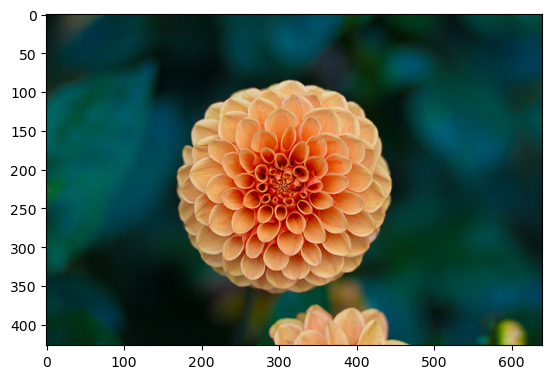

In [10]:
plt.imshow(img)
plt.show()

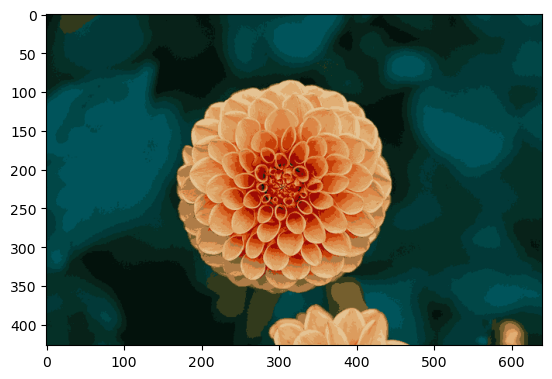

In [17]:
n_colors = 16

arr = img.reshape((-1, 3))
kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(arr)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
less_colors = centers[labels].reshape(img.shape).astype('uint8')

plt.imshow(less_colors)
plt.show()

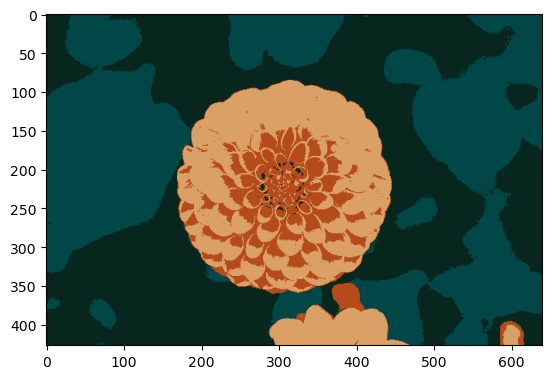

In [16]:
n_colors = 4

arr = img.reshape((-1, 3))
kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(arr)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
less_colors_4 = centers[labels].reshape(img.shape).astype('uint8')

plt.imshow(less_colors_4)
plt.show()

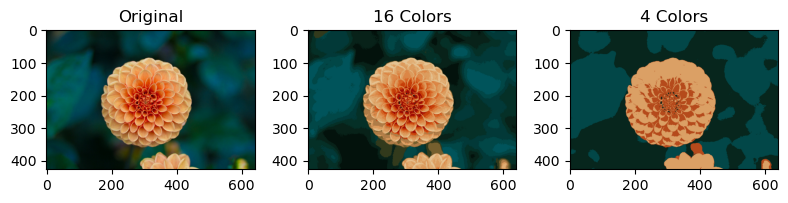

In [18]:
fig, (ax0,ax1,ax2) = plt.subplots(1, 3, figsize=(8, 4))

ax0.imshow(img)
ax0.set_title("Original")
ax1.imshow(less_colors)
ax1.set_title("16 Colors")
ax2.imshow(less_colors_4)
ax2.set_title("4 Colors")

fig.tight_layout()
plt.show()

Now let's try to apply KMeans clustering on the simple digits data that can be loaded from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

The goal is to use KMeans to try to identify similar digits without using the original label information.

Start by loading the digits and then finding the KMeans clusters. The digits data consists of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8×8 image.

In [21]:
# code here
from sklearn.datasets import load_digits
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64)),
 'target': array([0, 1, 2, ..., 8, 9, 8], shape=(1797,)),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7'

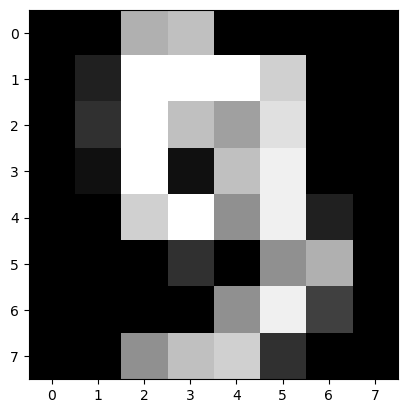

In [27]:
plt.imshow(digits.images[9], cmap='gray')
plt.show()

In [41]:
n_clus = 10
kmeans = KMeans(n_clusters=n_clus, random_state=42)
kmeans.fit(digits.data)
clusters = kmeans.predict(digits.data)
clusters

array([5, 7, 7, ..., 8, 9, 8], shape=(1797,), dtype=int32)

The cluster centroids themselves are 64-dimensional points, and can thus be interpreted as the "typical" digit within the cluster. Plot each cluster center. Hint: use *imshow*

In [37]:
kmeans.cluster_centers_.shape

(10, 64)

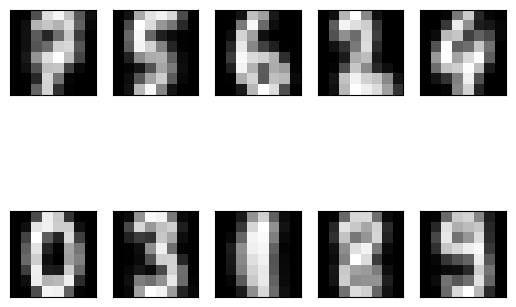

In [33]:
# code here
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
fig, axes = plt.subplots(2, 5)
ax = axes.ravel()
for ind, center in enumerate(centers):
    ax[ind].imshow(center, cmap='gray')
    ax[ind].set(xticks=[], yticks=[])

For each of the data points we also have access to their real labels (using *digits.target*). This means we can verify if the clustering algorithm split the data in such a way as to predict the original classes. 

Note that the labels of the discovered clusters may not directly match the initial labels in the dataset (they could be permuted). Write code to match each learned cluster label with the true labels of the data found in them.

In [53]:
# code here
import statistics

labels_clusters_actual = np.zeros(clusters.shape, dtype='int')

for i in range(n_clus):
    labels_clusters_actual[clusters == i] = statistics.mode(digits.target[clusters == i])

labels_clusters_actual

array([0, 1, 1, ..., 8, 9, 8], shape=(1797,))

Now compute the accuracy score between the true labels from the data and the predicted ones.

In [62]:
# code here
from sklearn.metrics import accuracy_score
print('Accuracy Score:', accuracy_score(digits.target, labels_clusters_actual))

Accuracy Score: 0.8614357262103506


Plot the confusion matrix between the predicted labels and the actual labels. Which were the digits that were most often confused with other digits?

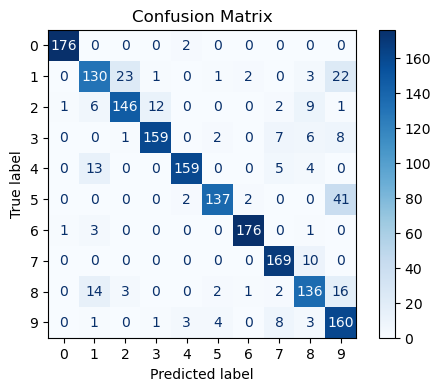

In [60]:
# code here
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(6,4))
ConfusionMatrixDisplay.from_predictions(digits.target, labels_clusters_actual,
                                        display_labels=digits.target_names, 
                                        cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix')
plt.show()

What if instead of keeping the original 64 features, we perform a projection into 2 dimensions?
Use the t-distributed stochastic neighbor embedding (t-SNE) algorithm to pre-process the data before performing KMeans. t-SNE is a nonlinear embedding algorithm that is particularly adept at preserving points within clusters.

Compute the new accuracy.

In [64]:
# code here
from sklearn.manifold import TSNE

data_embedded = TSNE(n_components=2, learning_rate='auto',
                     init='random').fit_transform(digits.data)

kmeans = KMeans(n_clusters=n_clus, random_state=42)
kmeans.fit(data_embedded)
clusters = kmeans.predict(data_embedded)

labels_clusters_actual = np.zeros(clusters.shape, dtype='int')

for i in range(n_clus):
    labels_clusters_actual[clusters == i] = statistics.mode(digits.target[clusters == i])

print('Accuracy Score:', accuracy_score(digits.target, labels_clusters_actual))

Accuracy Score: 0.894268224819143
